# Real-Time Segmentation with YOLACT

This notebook uses an open source project [YOLACT](https://github.com/dbolya/yolact) to segment objects in real-time on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install YOLACT

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/dbolya/yolact.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q --depth 1 {git_repo_url}
  !pip install -q youtube-dl
  !pip install -q --upgrade gdown
  
import sys
sys.path.append(project_name)

from IPython.display import YouTubeVideo

     |████████████████████████████████| 1.9 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


## Download pretrained weights for YOLACT (ResNet50 based)

In [2]:
import gdown  
pretrained_model = 'yolact_resnet50_54_800000.pth'
if not exists(pretrained_model):
  gdown.download(id='1yp7ZbbDwvMiFJEq4ptVKTYTI2VeRDXl0', output=pretrained_model, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yp7ZbbDwvMiFJEq4ptVKTYTI2VeRDXl0
To: /content/yolact_resnet50_54_800000.pth
100%|██████████| 127M/127M [00:02<00:00, 58.3MB/s]


## Segment objects on a test video with YOLACT

We are going to segment objects on the following youtube video:

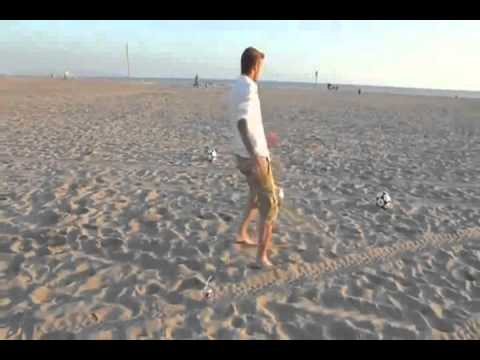

In [3]:
YOUTUBE_ID = 'c_6-8kvLFCs'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video and segment objects on the first 20 seconds:

In [ ]:
!rm -rf youtube.mp4 input.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4][vcodec!*=av01]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v={YOUTUBE_ID}
!ffmpeg -y -loglevel panic -i youtube.mp4 -t 20 input.mp4

!cd {project_name} && python eval.py --trained_model=../{pretrained_model} --score_threshold=0.3 --top_k=100 --video=../input.mp4:../pre_output.mp4
# encode with FFMPEG otherwise can't embedd in colab!
!ffmpeg -y -loglevel panic -i pre_output.mp4 output.mp4

Finally, visualize the result:

In [7]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4')